In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df = pd.read_csv('cleanedData.csv')
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'hourly_sal', 'emp_provided_sal', 'min_sal', 'max_sal',
       'avg_sal', 'job_state', 'same_state', 'company_age', 'python', 'r_lang',
       'excel', 'anaconda', 'rapid', 'sql', 'tensorflow', 'tableau', 'spark',
       'aws', 'job_simplified', 'seniority', 'job_description_len',
       'num_of_competetors'],
      dtype='object')

In [144]:
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace = True)
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,rapid,sql,tensorflow,tableau,spark,aws,job_simplified,seniority,job_description_len,num_of_competetors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,0,1,0,0,Data Scientist,NaN,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,1,0,0,0,0,0,Data Scientist,NaN,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,1,0,0,1,0,Data Scientist,NaN,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,0,0,0,Data Scientist,NaN,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,1,0,0,0,0,Data Scientist,NaN,2728,3


In [145]:
features = ['Company Name','job_simplified', 'seniority', 'job_description_len', 'Rating', 'job_state', 'same_state', 'company_age','num_of_competetors', 'min_sal', 'max_sal','avg_sal', 'hourly_sal', 'emp_provided_sal','python', 'r_lang','excel', 'anaconda', 'rapid', 'sql', 'tensorflow', 'tableau', 'spark','aws']
df1=df[features]
df1.head()

,Company Name,job_simplified,seniority,job_description_len,Rating,job_state,same_state,company_age,num_of_competetors,min_sal,...,python,r_lang,excel,anaconda,rapid,sql,tensorflow,tableau,spark,aws
0,Tecolote Research,Data Scientist,NaN,2536,3.8,NM,0,47,0,53,...,1,0,1,0,0,0,0,1,0,0
1,University of Maryland Medical System,Data Scientist,NaN,4783,3.4,MD,0,36,0,63,...,1,0,0,0,1,0,0,0,0,0
2,KnowBe4,Data Scientist,NaN,3461,4.8,FL,1,10,0,80,...,1,1,1,0,0,1,0,0,1,0
3,PNNL,Data Scientist,NaN,3883,3.8,WA,1,55,3,56,...,1,0,0,0,0,0,0,0,0,0
4,Affinity Solutions,Data Scientist,NaN,2728,2.9,NY,1,22,3,86,...,1,0,1,0,0,1,0,0,0,0


In [146]:
df1.describe()

,job_description_len,Rating,same_state,company_age,num_of_competetors,min_sal,max_sal,avg_sal,hourly_sal,emp_provided_sal,python,r_lang,excel,anaconda,rapid,sql,tensorflow,tableau,spark,aws
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3869.545822,3.618868,0.557951,46.591644,1.053908,74.719677,128.149596,101.434636,0.032345,0.022911,0.528302,0.076819,0.522911,0.001348,0.002695,0.512129,0.095687,0.199461,0.225067,0.237197
std,1521.495868,0.801210,0.496965,53.778815,1.384239,30.980593,45.220324,37.546122,0.177034,0.149721,0.499535,0.266484,0.499812,0.036711,0.051882,0.500190,0.294360,0.399865,0.417908,0.425651
min,407.000000,-1.000000,0.000000,-1.000000,0.000000,15.000000,16.000000,15.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2801.000000,3.300000,0.000000,11.000000,0.000000,52.000000,96.000000,73.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3731.000000,3.700000,1.000000,24.000000,0.000000,69.500000,124.000000,97.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4740.000000,4.000000,1.000000,59.000000,3.000000,91.000000,155.000000,122.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,10051.000000,5.000000,1.000000,276.000000,4.000000,202.000000,306.000000,254.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
df1.dtypes

Company Name            object
job_simplified          object
seniority               object
job_description_len      int64
Rating                 float64
job_state               object
same_state               int64
company_age              int64
num_of_competetors       int64
min_sal                  int64
max_sal                  int64
avg_sal                float64
hourly_sal               int64
emp_provided_sal         int64
python                   int64
r_lang                   int64
excel                    int64
anaconda                 int64
rapid                    int64
sql                      int64
tensorflow               int64
tableau                  int64
spark                    int64
aws                      int64
dtype: object

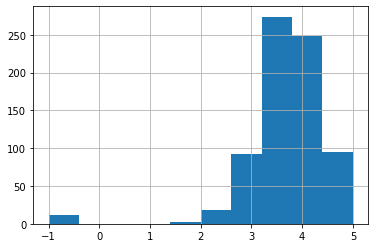

In [148]:
df.Rating.hist()

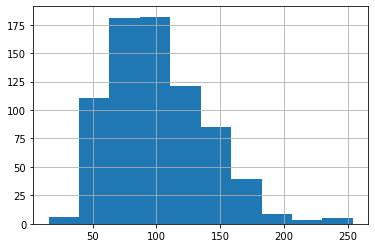

In [149]:
df.avg_sal.hist()

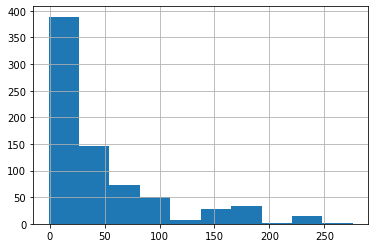

In [150]:
df1.company_age.hist()

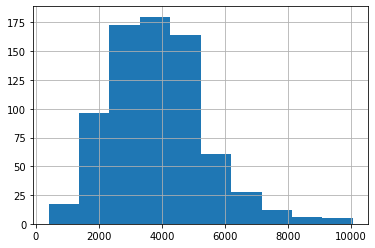

In [151]:
df1.job_description_len.hist()

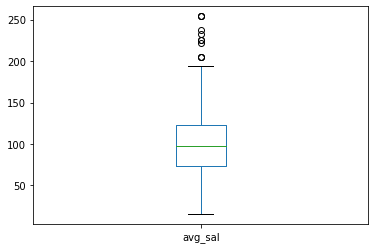

In [152]:
df1.avg_sal.plot(kind ='box')

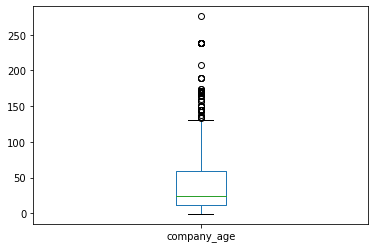

In [153]:
df1.company_age.plot(kind ='box')

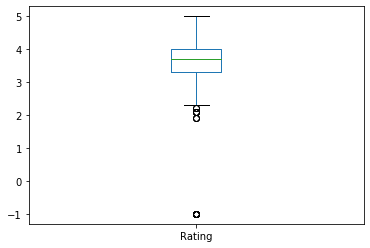

In [154]:
df1.Rating.plot(kind ='box')

In [155]:
df1[['company_age','avg_sal','Rating','job_description_len']].corr()

,company_age,avg_sal,Rating,job_description_len
company_age,1.000000,0.021996,0.021655,0.163911
avg_sal,0.021996,1.000000,0.012517,0.070474
Rating,0.021655,0.012517,1.000000,-0.012281
job_description_len,0.163911,0.070474,-0.012281,1.000000


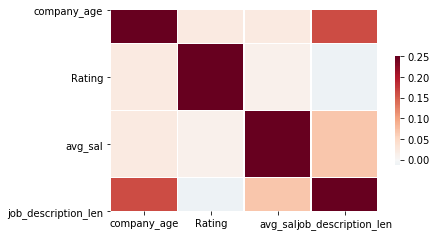

In [165]:
sns.heatmap(df1[['company_age','Rating','avg_sal','job_description_len']].corr(), vmax=.25, center=0,
            square=True, cmap = 'RdBu_r',linewidths=.5, cbar_kws={"shrink": .5})